In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "G:\DATASETS\digits"

CATEGORIES = ["0","1","2","3","4","5","6","7","8","9"]

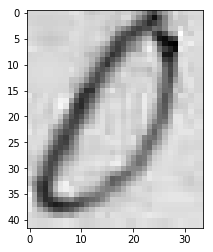

In [19]:


for category in CATEGORIES:  # iterate through every image of male and female
    path = os.path.join(DATADIR,category)  # create path to male and female
    for img in os.listdir(path):  # iterate over each image per male and female
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [20]:
print(img_array)

[[176 176 176 ... 178 178 178]
 [175 175 174 ... 176 177 177]
 [176 175 174 ... 181 178 178]
 ...
 [178 174 171 ... 181 181 181]
 [179 178 177 ... 180 180 181]
 [179 178 177 ... 180 180 181]]


In [21]:
print(img_array.shape)

(42, 34)


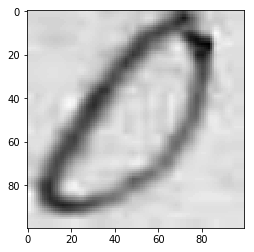

In [22]:

IMG_SIZE = 40

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

    

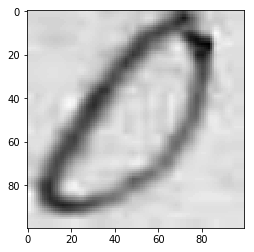

In [23]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [24]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do male and female

        path = os.path.join(DATADIR,category)  # create path to male and femnale
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=male 1=female

        for img in tqdm(os.listdir(path)):  # iterate over each image per male and female
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|███████████████████████████████████████| 760/760 [00:03<00:00, 213.08it/s]


7602


In [25]:
import random

random.shuffle(training_data)

In [26]:
for sample in training_data[:10]:
    print(sample[1])

8
6
6
3
5
1
0
9
3
9


In [27]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[164]
   [164]
   [163]
   ...
   [157]
   [158]
   [159]]

  [[163]
   [163]
   [163]
   ...
   [157]
   [158]
   [159]]

  [[163]
   [163]
   [162]
   ...
   [158]
   [158]
   [158]]

  ...

  [[138]
   [141]
   [147]
   ...
   [ 35]
   [ 57]
   [ 69]]

  [[108]
   [114]
   [125]
   ...
   [ 57]
   [ 88]
   [106]]

  [[ 87]
   [ 95]
   [110]
   ...
   [ 72]
   [110]
   [132]]]]


In [28]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=1000, epochs=3, validation_split=0.2)

Train on 6081 samples, validate on 1521 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/3


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf

DATADIR = "G:\DATASETS\digits"

CATEGORIES = ["0","1","2","3","4","5","6","7","8","9"]

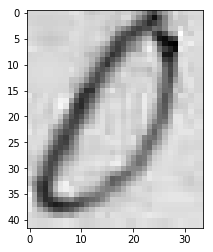

In [5]:

for category in CATEGORIES:  # iterate through every image of male and female
    path = os.path.join(DATADIR,category)  # create path to male and female
    for img in os.listdir(path):  # iterate over each image per male and female
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

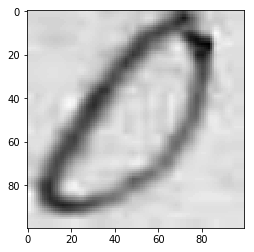

In [7]:

IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


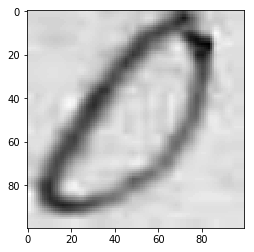

In [8]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [9]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do male and female

        path = os.path.join(DATADIR,category)  # create path to male and femnale
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=male 1=female

        for img in tqdm(os.listdir(path)):  # iterate over each image per male and female
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|███████████████████████████████████████| 760/760 [00:01<00:00, 478.71it/s]


7602


In [10]:
import random

random.shuffle(training_data)

In [11]:
for sample in training_data[:10]:
    print(sample[1])
    
    

5
6
8
9
1
5
6
8
4
5


In [15]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


[[[[149]
   [149]
   [150]
   ...
   [157]
   [158]
   [158]]

  [[149]
   [149]
   [151]
   ...
   [157]
   [158]
   [158]]

  [[151]
   [151]
   [152]
   ...
   [156]
   [157]
   [157]]

  ...

  [[150]
   [150]
   [152]
   ...
   [ 34]
   [ 17]
   [ 17]]

  [[152]
   [152]
   [153]
   ...
   [ 31]
   [ 13]
   [ 13]]

  [[153]
   [153]
   [153]
   ...
   [ 30]
   [ 12]
   [ 12]]]]


In [16]:
X = X/255.0

In [10]:
import tensorflow as tf
import matplotlib as plt

In [4]:
mnist = tf.keras.datasets.mnist#fashion_mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train , axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation= tf.nn.softmax))

model.compile(optimizer = 'adam',
             loss ='sparse_categorical_crossentropy' ,
             metrics = ['accuracy'])

model.fit(x_train,y_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 14s 226us/sample - loss: 0.3257 - acc: 0.9074
Epoch 2/3
60000/60000 [==============================] - 10s 163us/sample - loss: 0.1241 - acc: 0.9614
Epoch 3/3
60000/60000 [==============================] - 10s 160us/sample - loss: 0.0857 - acc: 0.9733


In [5]:
print (x_train[0].shape)

(28, 28)


In [6]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 2s 230us/sample - loss: 0.1033 - acc: 0.9670
0.10334224978126585 0.967


In [7]:
predictions = model.predict([x_test])
print(predictions)

[[7.6594557e-07 1.3104378e-06 2.1090833e-04 ... 1.0812760e-11
  3.7683689e-12 1.6102487e-11]
 [9.7329297e-11 8.6573498e-05 9.9990869e-01 ... 6.0942955e-17
  1.1509971e-16 1.1090496e-17]
 [1.9063887e-07 9.9958259e-01 4.8554859e-05 ... 8.2980861e-10
  8.4561042e-10 6.6697348e-10]
 ...
 [1.3106424e-07 2.0410276e-07 1.2040484e-06 ... 7.2398493e-12
  4.3251240e-12 4.7725235e-12]
 [2.0239913e-05 3.7707066e-06 3.6453875e-07 ... 8.5057232e-11
  8.9261709e-11 1.3295670e-10]
 [2.0498937e-05 5.5874526e-08 5.9326391e-07 ... 1.0956796e-12
  1.2580348e-12 2.7527408e-13]]


In [15]:
import numpy as np
#size = 1000
print(np.argmax(predictions[1000]))

9


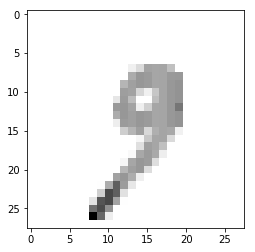

In [16]:
import matplotlib.pyplot as plt 
plt.imshow(x_test[1000],cmap = plt.cm.binary)
plt.show()